# Machine Intelligence II (week 5) - Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

## Exercise 1
### A

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io.wavfile

In [2]:
sig = np.loadtxt("sound1.dat")
sound1 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
scipy.io.wavfile.write("sound1_orig.wav", 8192, sound1)

sig = np.loadtxt("sound2.dat")
sound2 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
scipy.io.wavfile.write("sound2_orig.wav", 8192, sound2)

sounds = np.array([sound1, sound2])
sounds[:, 0:5]

array([[  0,   0,   0,  -6,   2],
       [  0,  -1, -30, -19,   5]], dtype=int16)

### B

In [5]:
A = np.random.random((2, 2))
# print(A)
A_inv = np.linalg.inv(A)
xsounds = np.dot(A, sounds)
# print(xsounds[:, 0:3])

# xsounds = mixed sounds
scipy.io.wavfile.write("sound1_mixed.wav", 8192, xsounds[0])
scipy.io.wavfile.write("sound2_mixed.wav", 8192, xsounds[1])

[[ 0.01462281  0.9267317 ]
 [ 0.54071393  0.48144801]]
[[  0.          -0.9267317  -27.8019509 ]
 [  0.          -0.48144801 -14.4434403 ]]


### C

In [6]:
neworder = np.random.permutation(np.arange(18000)) 
pxsounds = xsounds[:, np.asarray(neworder)]
print(pxsounds[:, 0:3])

# pxsounds = permutated mixed sounds
scipy.io.wavfile.write("sound1_mixed_perm.wav", 8192, pxsounds[0])
scipy.io.wavfile.write("sound2_mixed_perm.wav", 8192, pxsounds[1])

[[-19609.88588583 -20550.45634417  28019.12064425]
 [ -9959.92518376 -10649.01466291  14162.28892245]]


### D

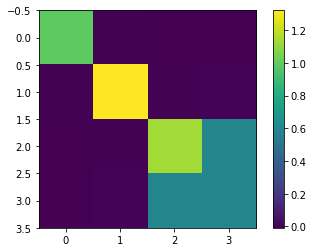

In [7]:
# doublecheck: formula
correlation = np.cov(sounds, pxsounds) / np.std(sounds, ddof=len(sounds)-1) / np.std(pxsounds, ddof=len(pxsounds)-1)
plt.imshow(correlation, interpolation='none')
plt.colorbar()

### E

In [126]:
# doublecheck: 1st centered each sound; 2nd centered overall -> which one?

# cpxsounds = centered permutated mixed sounds
cpxsounds = (pxsounds.T - np.mean(pxsounds, 1)).T           

# cxsounds = centered mixed sounds
cxsounds = xsounds - np.mean(xsounds,1)[:,np.newaxis]
# cxsounds[:, 0:3]

## Exercise 2
### A

In [127]:
#doublecheck: take datapoint x = cpx or cx?

# slideset 22_ page 20


# algorithm skript page 32 (online learning ICA)
t = 1
eps0 = 0.0002
for n in range(1000):
    eps = eps0 / t
    x = cxsounds.T[n]
    W_inv = np.linalg.inv(W)
    dW = np.zeros_like(W)
    for (i, j), value in np.ndenumerate(W):
        argument = W[i, 0] * x[0] + W[i, 1]*x[1]
        dW[i, j] = W_inv[j, i] + fdashfrac(argument) * x[j]     # formula script 2.87
    W += eps * dW
    t += 1

print("W end")
print(W)

W end
[[ 0.2606302   0.11025224]
 [-0.00157864  0.00264092]]


/home/dpenguin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


In [144]:
def ddf_by_df(inp):
    return 1-2.0/(1+np.exp(-inp))

W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)

eta_0 = .01
for t in range(len(xsounds[0])):
    eta = eta_0/(t+1)
    W_inv = np.linalg.inv(W)
    x = cxsounds[:,t]
    gradient = W_inv.T + np.dot(ddf_by_df(np.dot(W,x)),x[:,np.newaxis])
    W += eta*gradient
print("W end")
print(W)

Goal:
[[-0.97447944  1.87576013]
 [ 1.09443718 -0.02959744]]
W start
[[ 0.71226077  0.21365559]
 [ 0.16278197  0.61860298]]


/home/dpenguin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


W end
[[ 0.28784309 -0.5363323 ]
 [-0.51911152 -0.05104578]]


### B

In [148]:
W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)
eta_0 = .001

for t in range(18000):
    x = cxsounds[:,t]
    gradient = np.dot(np.eye(2) + np.dot(ddf_by_df(np.dot(W,x)),np.dot(W,x)[:,np.newaxis]),W)
    eta = eta_0/(t+1)
    W += eta*gradient
#     if t%2000 == 0:
#         print(t)
#         print(W)
print("W end")
print(W)

Goal:
[[-0.97447944  1.87576013]
 [ 1.09443718 -0.02959744]]
W start
[[ 0.74090143  0.97164871]
 [ 0.49588427  0.16319407]]


/home/dpenguin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


W end
[[ 0.12378616  0.40844283]
 [-0.12378616 -0.40844283]]


In [117]:
W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)

# skript formula 2.100
t = 1
eps0 = 0.000002
for n in range(18000):
    eps = eps0 / t
    x = cpxsounds.T[n]
    dW = np.zeros_like(W)
    for (i, j), value in np.ndenumerate(W):
        for l in range(2):
            delta_i_l = 0                       # TODO: false
            argument_i_k = W[i, 0] * x[0] + W[i, 1]*x[1]
            argument_l_k = W[l, 0] * x[0] + W[l, 1]*x[1]
            dW[i, j] = W[l, j] * (delta_i_l + fdashfrac(argument_i_k) * argument_l_k)
    W += eps * dW
    t += 1

print("W end")
print(W)

Goal:
[[-0.97447944  1.87576013]
 [ 1.09443718 -0.02959744]]
W start
[[ 0.39345598  0.20262807]
 [ 0.28733154  0.72635252]]
W end
[[ 0.36249195  0.12435332]
 [ 0.25530779  0.6453989 ]]


/home/dpenguin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
